In [17]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [18]:
#Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1,  return_X_y=True)
print(X.shape, y.shape)
#[output should be] (70000, 784) (70000,)

(70000, 784) (70000,)


In [19]:
# Converting the Matrix into Pandas data frame
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))
#[output should be] (70000, 786)

Size of the dataframe: (70000, 786)


<Figure size 432x288 with 0 Axes>

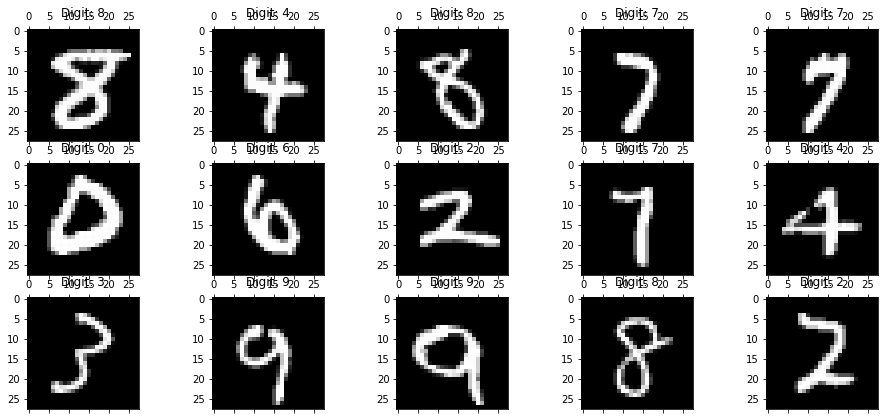

In [20]:
#Since the 70,000 datapoints are too big, we create a subset of dataset and work with that
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

# Check how these random number looks like
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [23]:
# again we create a subsample that only contains 10000 rows
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

# Run the tSNE, which is time consuming
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.764s...
[t-SNE] Computed neighbors for 10000 samples in 151.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.574440
[t-SNE] KL divergence after 300 iterations: 2.835563
t-SNE done! Time elap

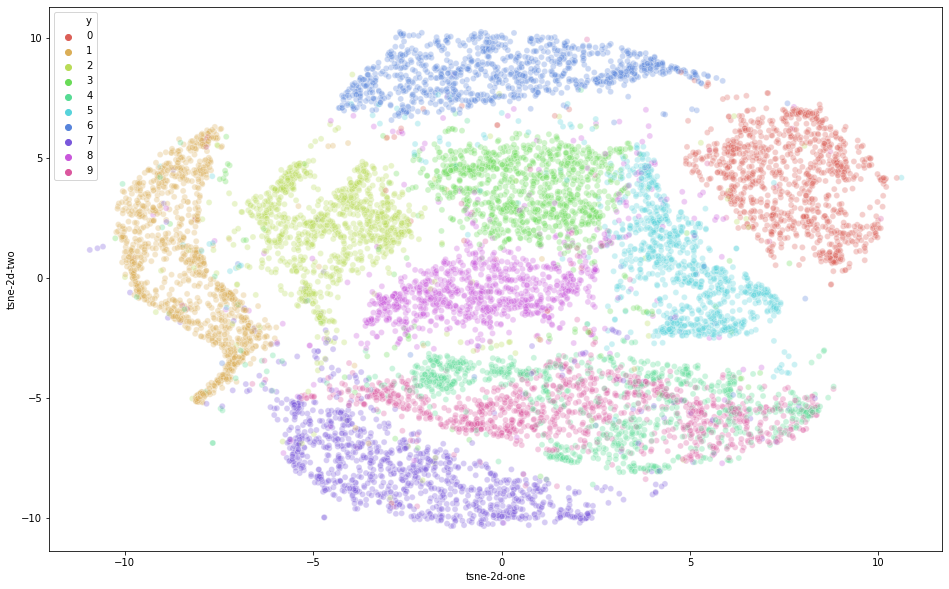

In [24]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [26]:
import numpy as np
import scipy.linalg as la


A = np.array([[1,3,5],[3,13,23],[5,23,42]])
print ('original matrix:')
print (A)
print ('------')
L = la.cholesky(A)

print ('Cholesky result:')
print(L)
print(A)
#print(np.dot(L.T, L))

original matrix:
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]
------
Cholesky result:
[[1. 3. 5.]
 [0. 2. 4.]
 [0. 0. 1.]]
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]
